# **SUSY (Supersymmetry) Dataset:**

**Source:** The data is derived from simulated high-energy physics experiments, particularly proton-proton collision events in the LHC.

**Features:** The dataset includes various features derived from the detector readings during these collisions, such as momentum, energy, and angles of particles.

**Target Variable:** The target variable is often binary, indicating the presence or absence of supersymmetric particles (Sparticles). In some versions, it could represent a specific outcome or property of interest in the collision events.

**Purpose:** The dataset is commonly used as a benchmark in machine learning tasks, specifically for binary classification problems. Researchers and data scientists use it to develop and test classification algorithms that can identify events with or without supersymmetric particles.

**Challenge:** Analyzing the SUSY dataset poses challenges due to its high dimensionality, complex features, and the need for advanced techniques to discern patterns indicative of supersymmetry.

**Research Context:** The dataset is employed in the field of particle physics to explore the potential existence of supersymmetric particles, which are hypothesized but not yet observed in experiments.


**Question:** Can we write an algorithm that analyzes the signal and background data in the dataset, and classifies whether a given piece of information corresponds to a supersymmetric particle or not? And which algorithm classifies it more precisely?

We have decided to use two different methods, Neural Network and Naive Bayes, to get useful insights from our dataset. Each method has its own strengths—one looks at things in a complex, non-linear way, and the other takes a more probability-based approach.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import plotly.express as px
from sklearn.metrics import classification_report

# Explore, visualize,describe


<span style="font-family:Candara; font-size:1.5em;">The feature names in the downloaded dataset consisted of numbers. Therefore, to avoid confusion during data analysis, we updated the feature names using information obtained from the website where the data is hosted and the relevant article mentioned by that website.</span>


<span style="font-family:Candara; font-size:1.5em;">We have took 500k of the total 5 million SUSY data and have worked on smallSUSY dataset due to disk problems </span>


In [2]:
df=pd.read_csv('smallSUSY.csv')
df=df.iloc[:,1:]
new_column_names = ['Label',
    'lepton 1 pT',
    'lepton 1 eta',
    'lepton 1 phi',
    'lepton 2 pT',
    'lepton 2 eta',
    'lepton 2 phi',
    'missing energy magnitude',
    'missing energy phi',
    'MET_rel',
    'axial MET',
    'M_R',
    'M_TR_2',
    'R',
    'MT2',
    'S_R',
    'M_Delta_R',
    'dPhi_r_b',
    'cos(theta_r1)'
]
df.columns=new_column_names
df

Label  lepton 1 pT  lepton 1 eta  lepton 1 phi  lepton 2 pT  \
0         1.0     1.667973      0.064191     -1.225171     0.506102   
1         1.0     0.444840     -0.134298     -0.709972     0.451719   
2         1.0     0.381256     -0.976145      0.693152     0.448959   
3         1.0     1.309996     -0.690089     -0.676259     1.589283   
4         0.0     0.456398      1.099371      1.512453     0.751772   
...       ...          ...           ...           ...          ...   
499995    1.0     0.910016     -0.364544     -0.777120     0.543648   
499996    1.0     0.842954      0.332476     -1.048564     1.347989   
499997    0.0     1.370760     -1.162912      0.893499     2.118091   
499998    0.0     0.762400      0.440924      0.342885     1.034283   
499999    1.0     0.668017     -1.013524      1.661522     0.806839   

        lepton 2 eta  lepton 2 phi  missing energy magnitude  \
0          -0.338939      1.672543                  3.475464   
1          -1.613871     -0.768661                  1.219918   
2           0.891753     -0.677328                  2.033060   
3          -0.693326      0.622907                  1.087562   
4           0.638967     -0.742216                  0.322601   
...              ...           ...                       ...   
499995     -0.910632     -1.723707                  2.864673   
499996      0.320496     -0.666358                  0.450433   
499997      1.248496     -0.887211                  0.164659   
499998      1.740353     -1.083314                  0.872145   
499999      0.265961     -0.168963                  1.340346   

        missing energy phi   MET_rel  axial MET       M_R    M_TR_2         R  \
0                -1.219136  0.012955   3.775174  1.045977  0.568051  0.481928   
1                 0.504026  1.831248  -0.431385  0.526283  0.941514  1.587535   
2                 1.533041  3.046260  -1.005285  0.569386  1.015211  1.582217   
3                -0.381742  0.589204   1.365479  1.179295  0.968218  0.728563   
4                 1.321054  0.169502   0.359941  0.489256  0.416168  0.754829   
...                    ...       ...        ...       ...       ...       ...   
499995            1.458272  2.176558  -0.590911  0.673695  1.662140  2.189362   
499996           -0.411872  0.293407   0.630491  0.859920  0.403371  0.416258   
499997            0.316840  0.215165   0.280418  3.087083  0.526929  0.151467   
499998           -1.519894  0.284328  -0.360861  0.956828  0.965979  0.895881   
499999           -1.161350  1.842903   1.294678  0.779448  0.917905  1.045029   

             MT2       S_R  M_Delta_R  dPhi_r_b  cos(theta_r1)  
0       0.000000  0.448410   0.205356  1.321893       0.377584  
1       2.024308  0.603498   1.562374  1.135454       0.180910  
2       1.551914  0.761215   1.715464  1.492257       0.090719  
3       0.000000  1.083158   0.043429  1.154854       0.094859  
4       0.303750  0.461067   0.345541  0.733242       0.186044  
...          ...       ...        ...       ...            ...  
499995  1.195041  0.910815   1.181893  1.252362       0.826035  
499996  0.591989  0.372003   0.716788  0.366991       0.265798  
499997  0.308067  3.098183   0.233042  0.876216       0.000593  
499998  1.020396  0.996446   0.943458  1.299870       0.197220  
499999  0.000000  0.836322   1.041735  1.479641       0.056507  

[500000 rows x 19 columns]

<span style="font-family:Candara; font-size:1.5em;">First, we separated the labels from the features, and then we split each into training and test datasets.</span>


In [3]:
X,y=df.iloc[:,1:],df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(
      X.to_numpy(), y.to_numpy(), test_size=0.25, random_state=42)




# Statistical Summary and Histograms

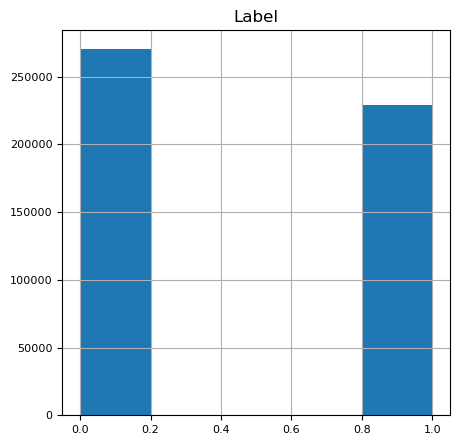

In [4]:

df[df.columns[0:1]].hist(figsize=(5, 5), bins=5, xlabelsize=8, ylabelsize=8);

In [5]:
print(df[df.columns[1:19]].describe())

         lepton 1 pT   lepton 1 eta   lepton 1 phi    lepton 2 pT  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        1.000488       0.000357      -0.001995       0.999262   
std         0.683727       1.002149       1.001986       0.652296   
min         0.255507      -2.102860      -1.734772       0.428590   
25%         0.561989      -0.756711      -0.869564       0.597262   
50%         0.791943       0.000376      -0.001582       0.799874   
75%         1.207008       0.757369       0.865386       1.162750   
max        16.632372       2.101588       1.734839      26.110743   

        lepton 2 eta   lepton 2 phi  missing energy magnitude  \
count  500000.000000  500000.000000             500000.000000   
mean        0.000936      -0.000319                  1.001160   
std         1.003124       1.001897                  0.873068   
min        -2.059306      -1.734202                  0.000709   
25%        -0.769916      -0.869823                  

<span style="font-family:Candara; font-size:1.5em;">Firstly, we created histograms for each feature based on the entire dataset. </span>


array([[<Axes: title={'center': 'Label'}>,
        <Axes: title={'center': 'lepton 1 pT'}>,
        <Axes: title={'center': 'lepton 1 eta'}>,
        <Axes: title={'center': 'lepton 1 phi'}>],
       [<Axes: title={'center': 'lepton 2 pT'}>,
        <Axes: title={'center': 'lepton 2 eta'}>,
        <Axes: title={'center': 'lepton 2 phi'}>,
        <Axes: title={'center': 'missing energy magnitude'}>],
       [<Axes: title={'center': 'missing energy phi'}>,
        <Axes: title={'center': 'MET_rel'}>,
        <Axes: title={'center': 'axial MET'}>,
        <Axes: title={'center': 'M_R'}>],
       [<Axes: title={'center': 'M_TR_2'}>,
        <Axes: title={'center': 'R'}>, <Axes: title={'center': 'MT2'}>,
        <Axes: title={'center': 'S_R'}>],
       [<Axes: title={'center': 'M_Delta_R'}>,
        <Axes: title={'center': 'dPhi_r_b'}>,
        <Axes: title={'center': 'cos(theta_r1)'}>, <Axes: >]],
      dtype=object)

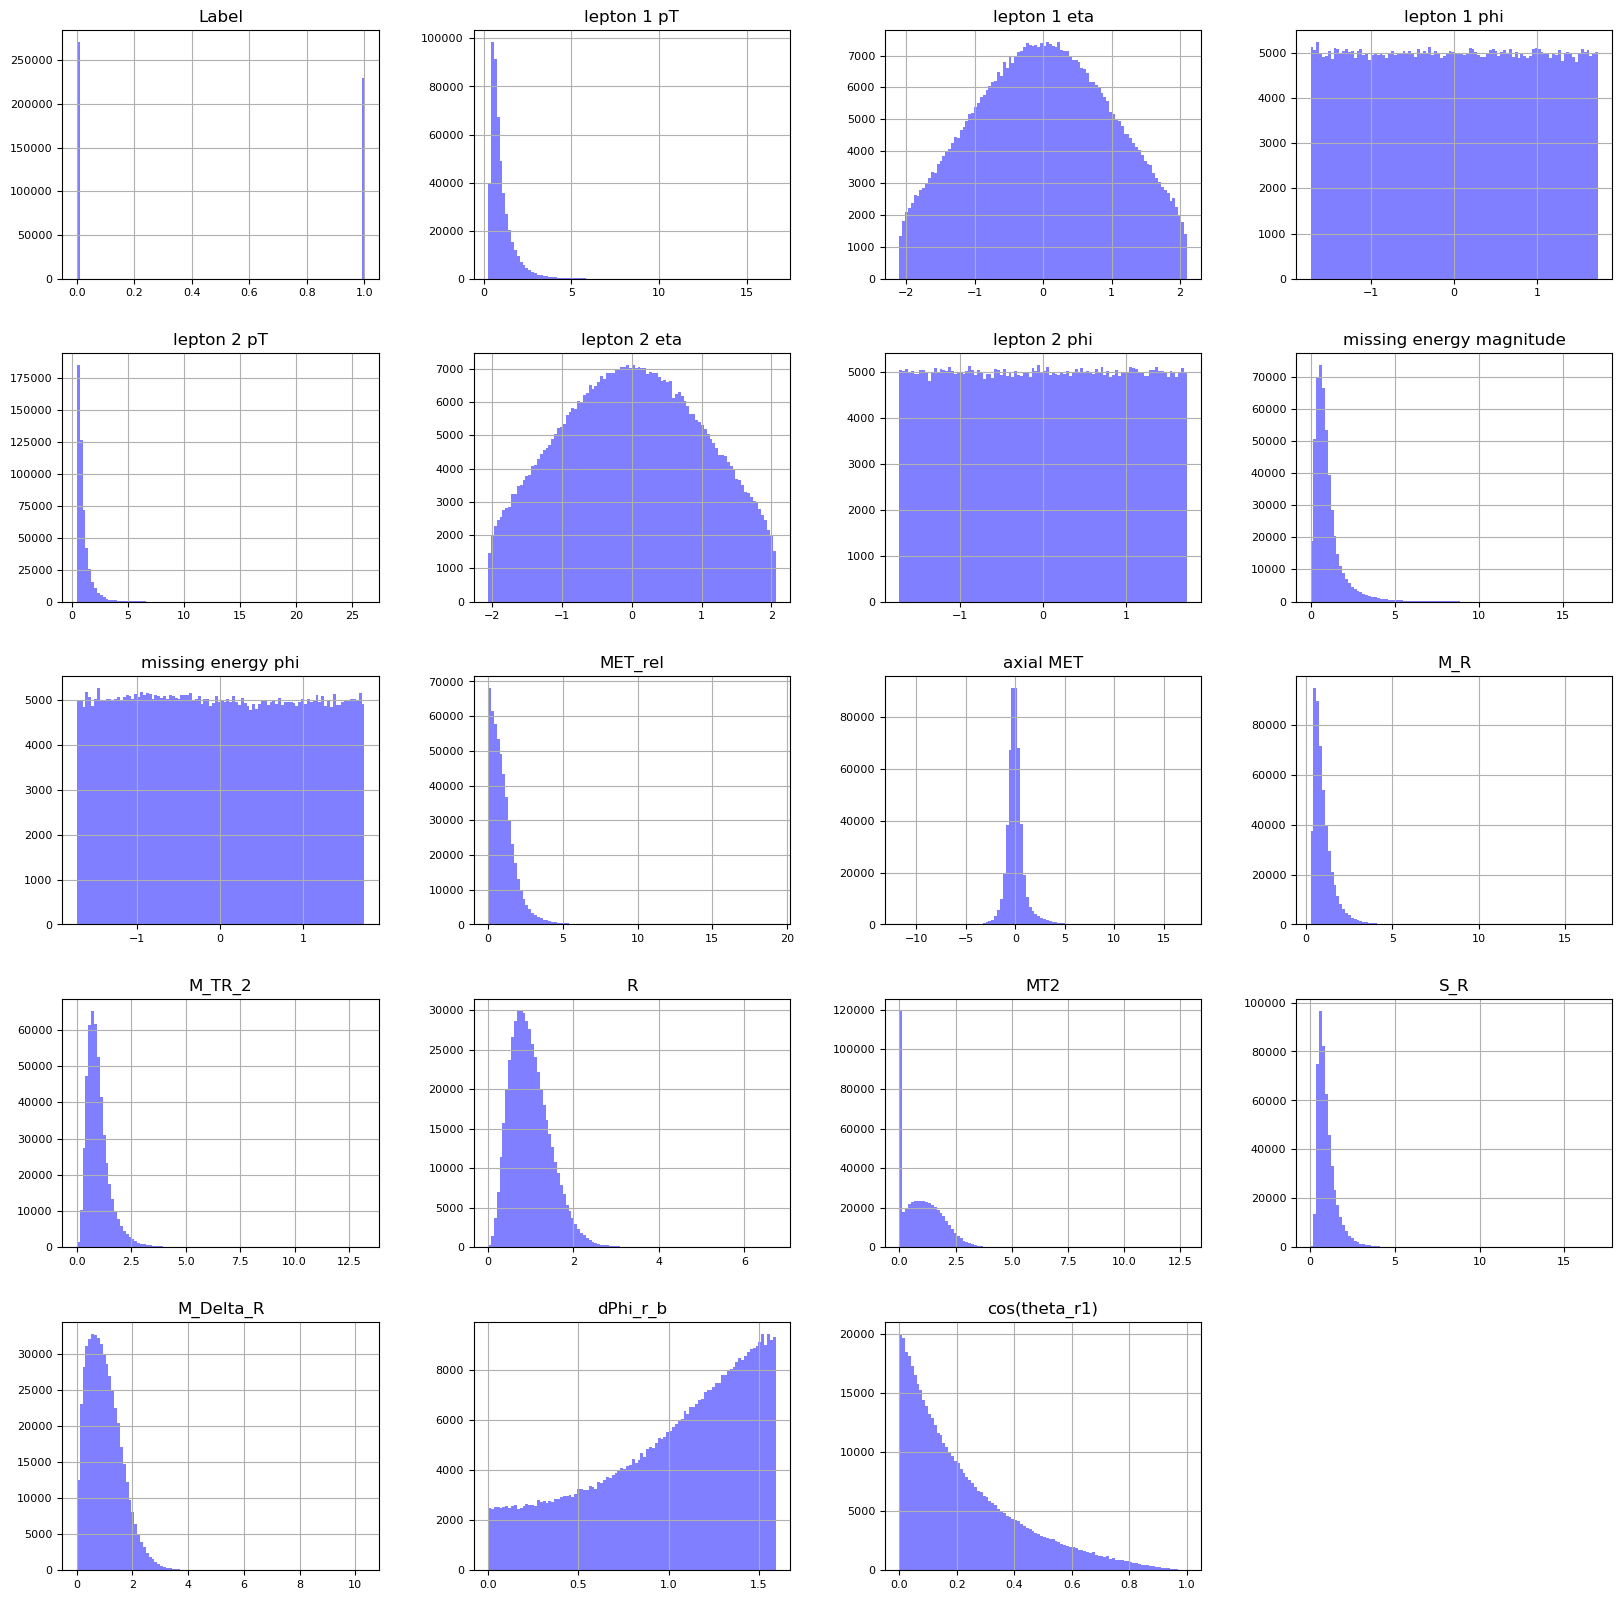

In [6]:
df.hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8,alpha=0.5, color='blue')


<span style="font-family:Candara; font-size:1.5em;">Then, by separating signal and background data, we overlaid them on each histogram. This allowed us to examine the differences between the distributions of signal and background.</span>


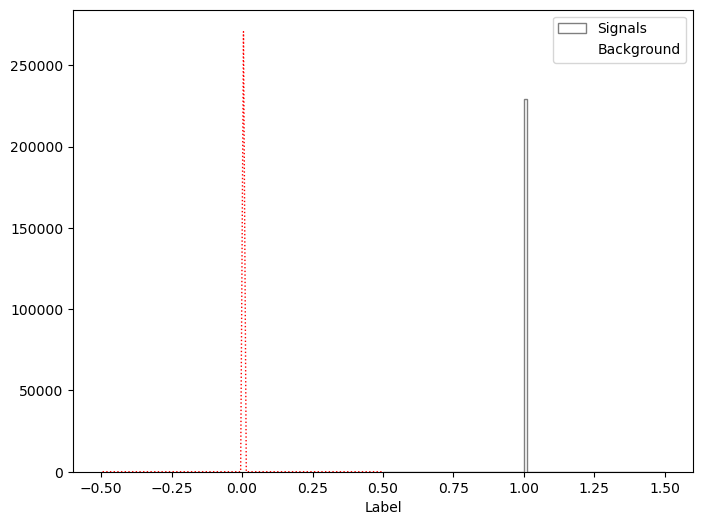

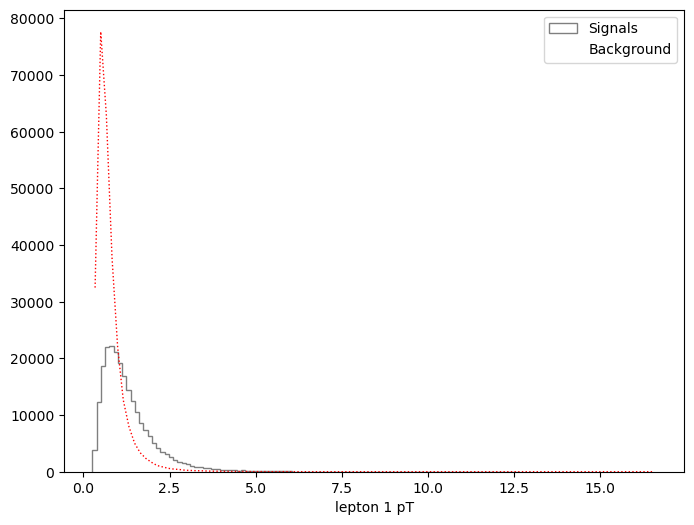

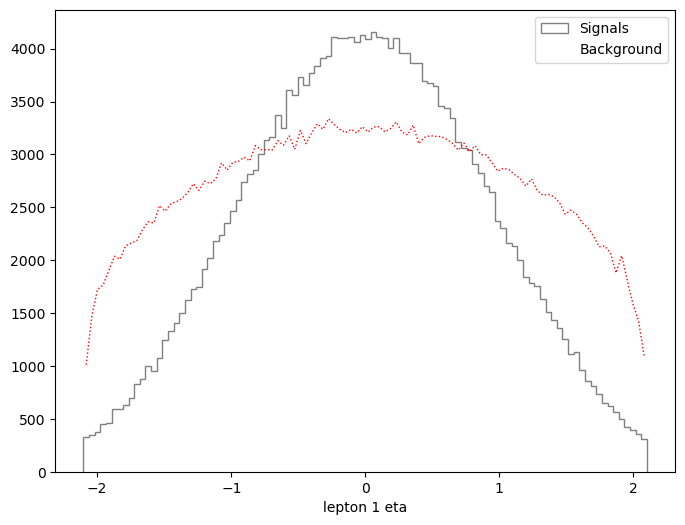

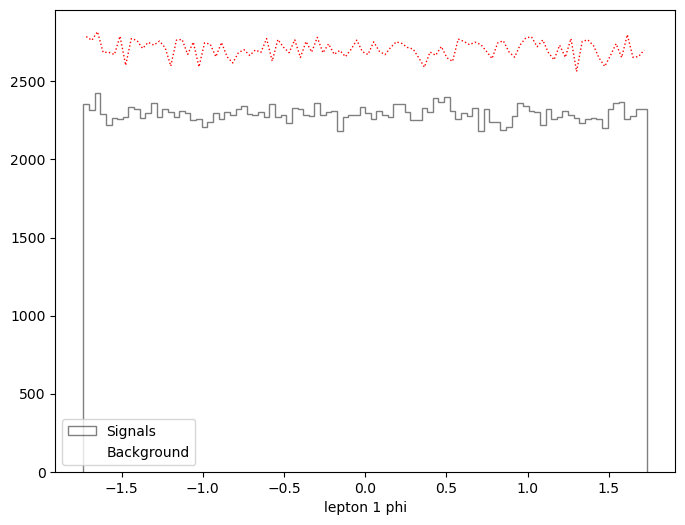

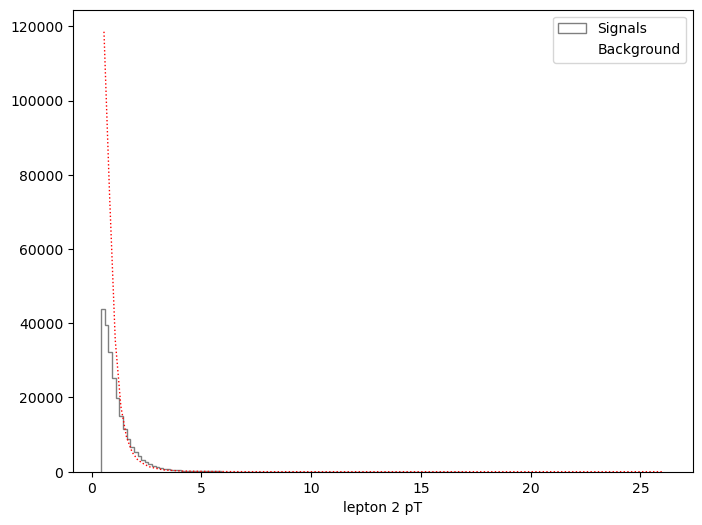

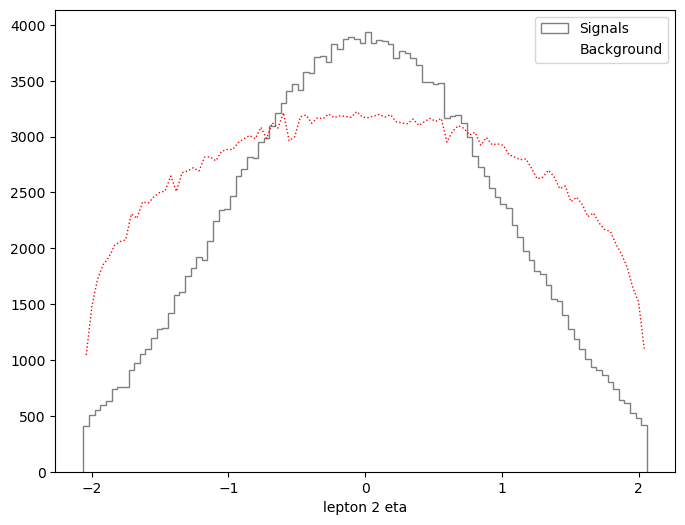

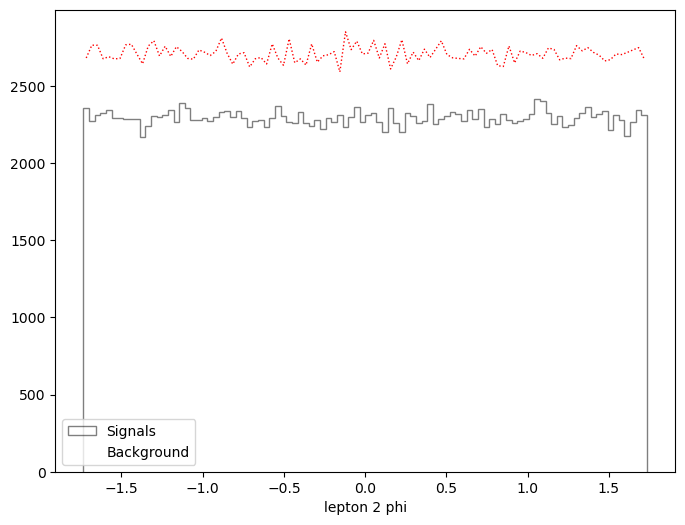

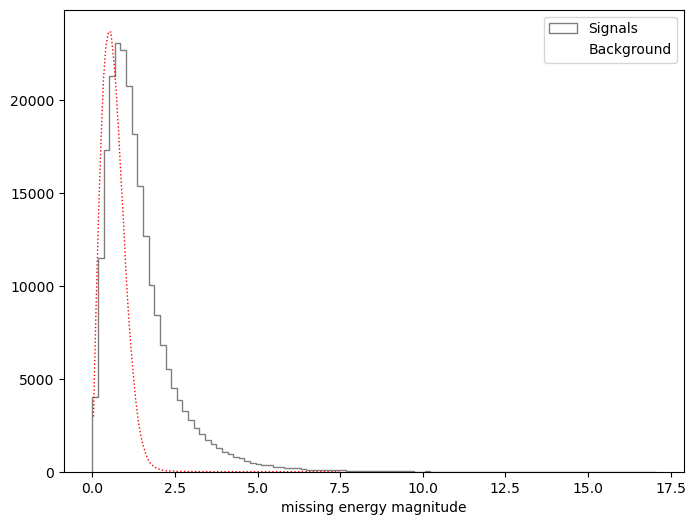

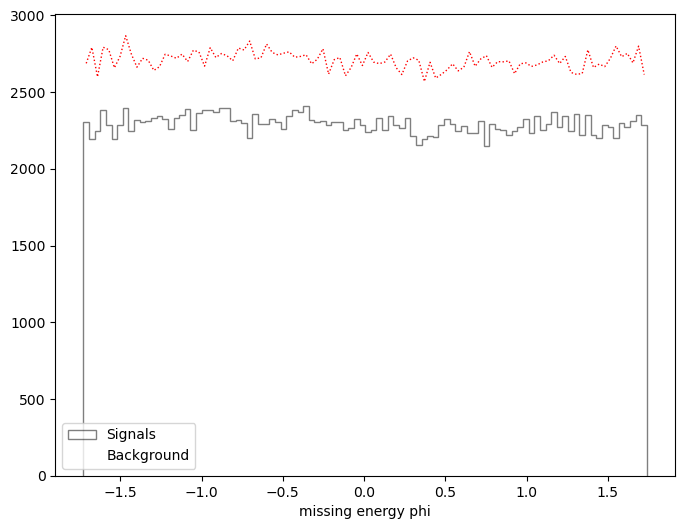

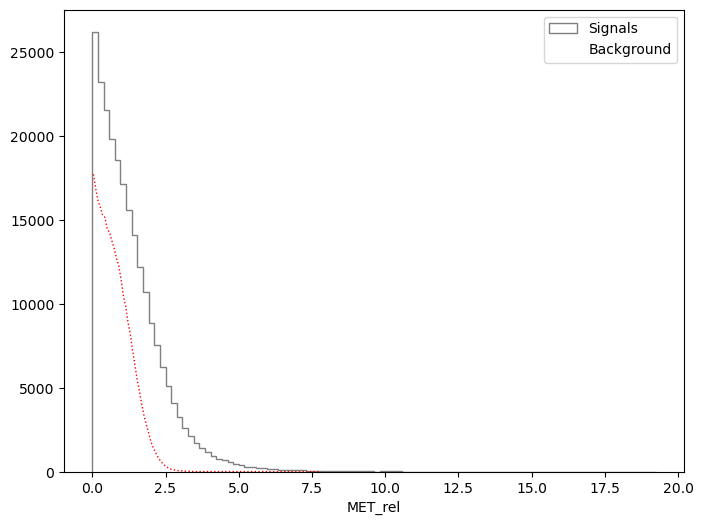

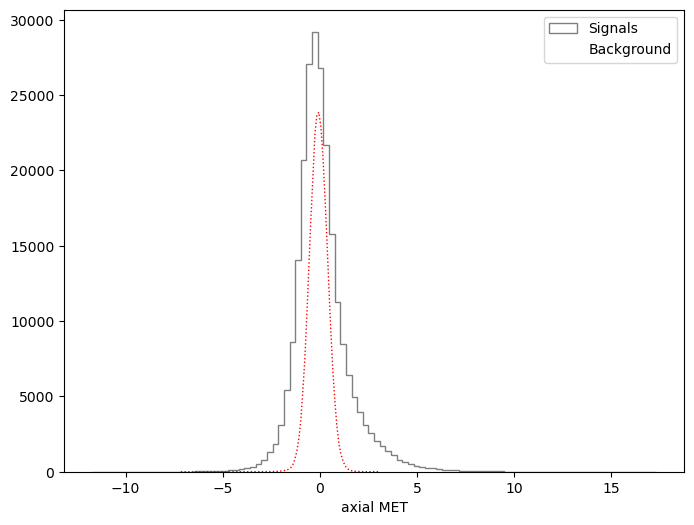

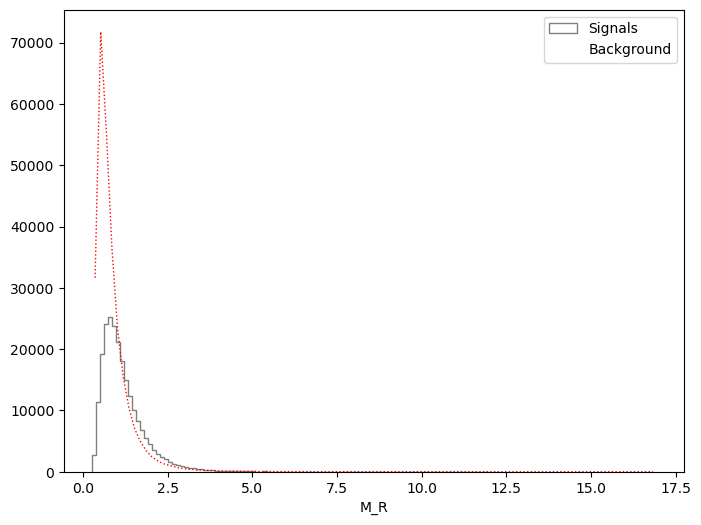

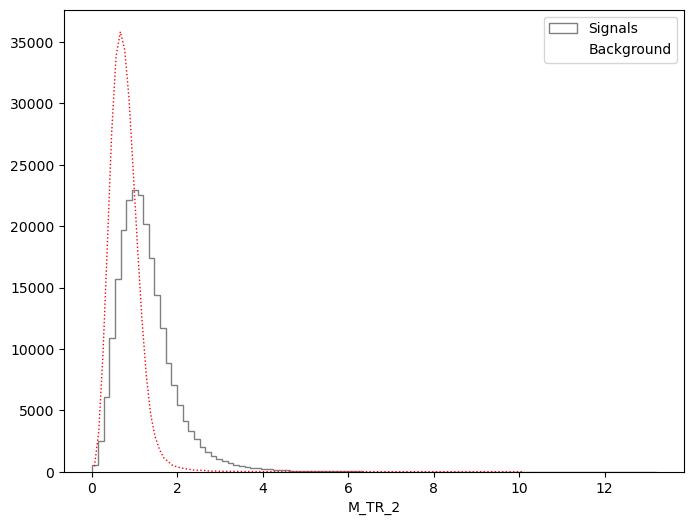

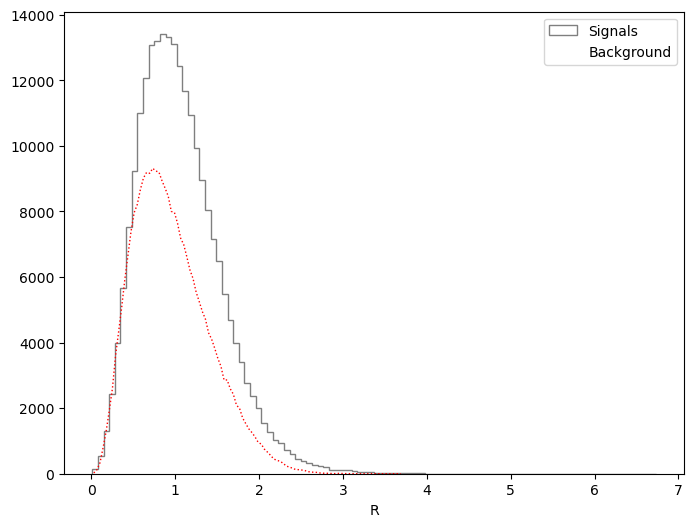

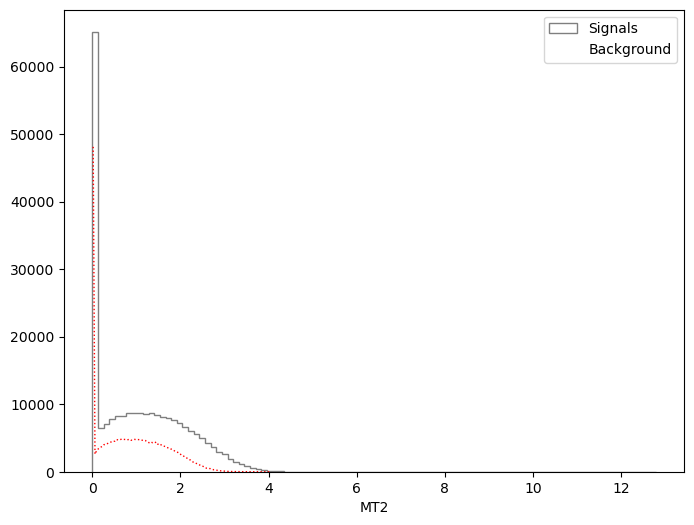

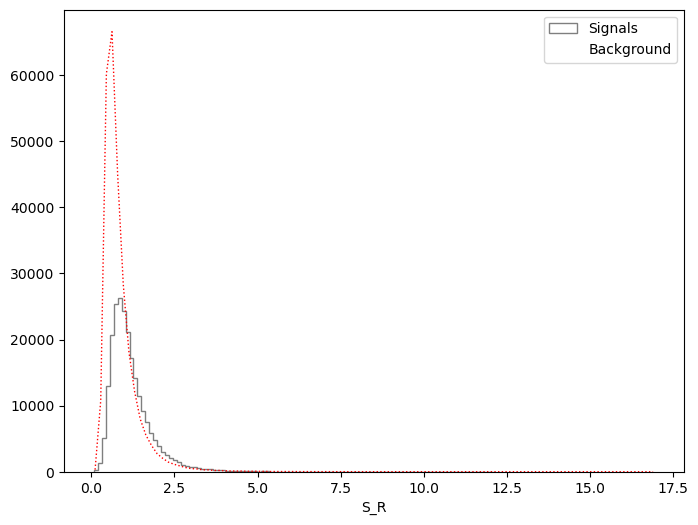

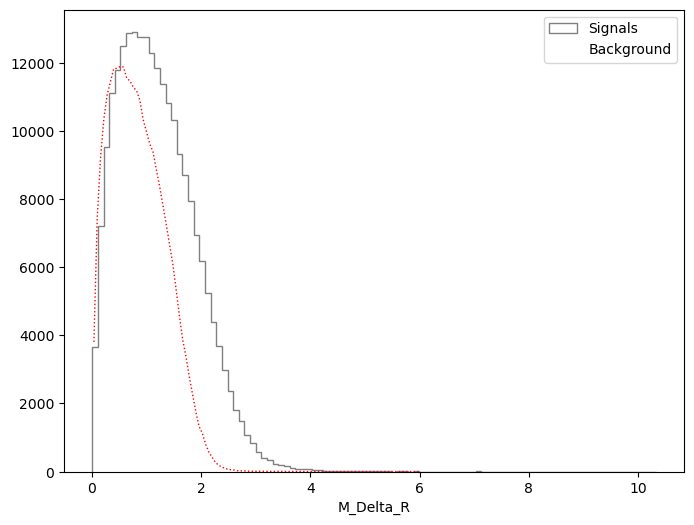

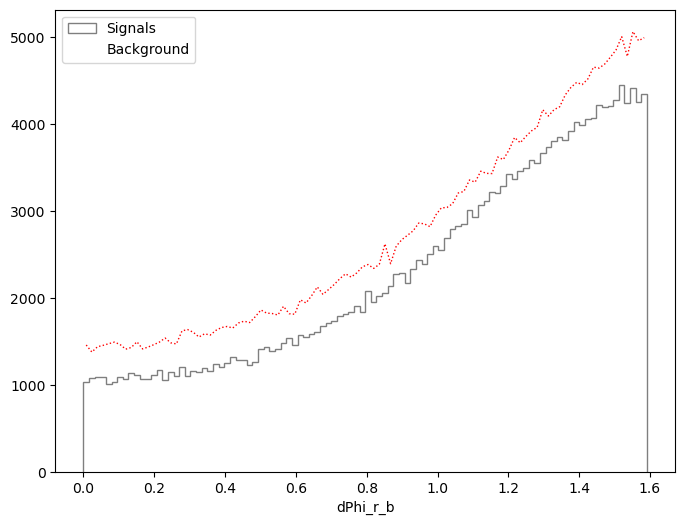

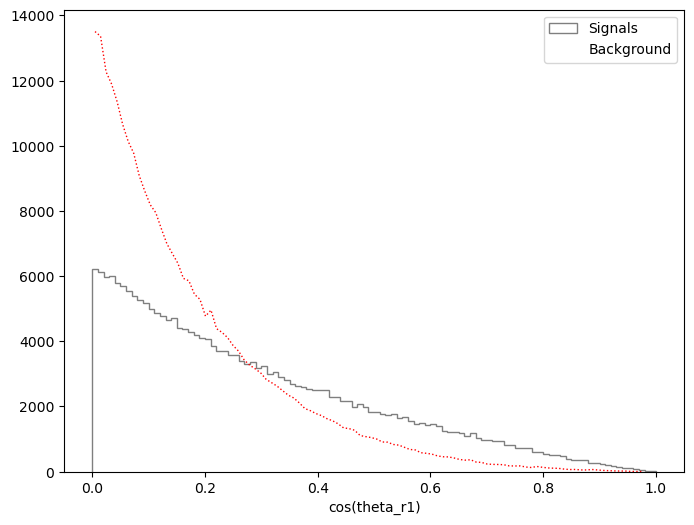

In [7]:
df_signals=df[df.iloc[:,0]==1]
df_background=df[df.iloc[:,0]==0]
for feature in new_column_names:
    plt.figure(figsize=(8, 6))
    plt.hist(df_signals[feature], bins=100, alpha=0.5, label='Signals', color='black',histtype='step')
    n, bins, patches =plt.hist(df_background[feature], bins=100, alpha=0, label='Background')
    plt.plot(bins[:-1] + 0.5 * (bins[1] - bins[0]), n, linestyle='dotted', color='red', linewidth=1)

    # Add labels and a legend
    plt.xlabel(feature)
    
    plt.legend()

    # Show the plot
    plt.show()

# Correlations

<span style="font-family:Candara; font-size:1.5em;">In terms of examining the information in the data and determining whether this information corresponds to a supersymmetric particle, we believed that relationships between features could provide important insights. Therefore, we analyzed the relationships between features and visualized the results.</span>


<Axes: >

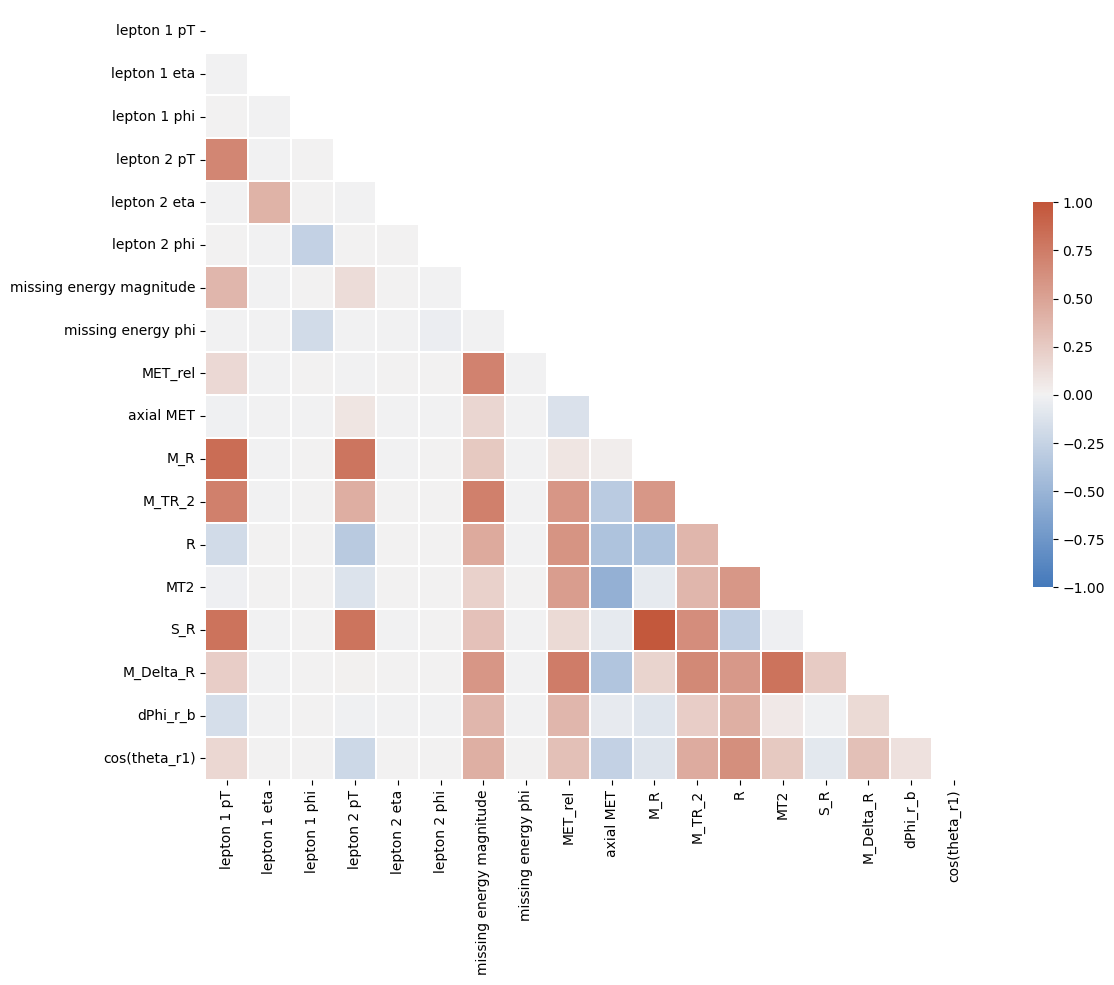

In [4]:
# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1 ,vmax=1, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})

In [5]:
features = ['lepton 1 pT',
    'lepton 1 eta',
    'lepton 1 phi',
    'lepton 2 pT',
    'lepton 2 eta',
    'lepton 2 phi',
    'missing energy magnitude',
    'missing energy phi',
    'MET_rel',
    'axial MET',
    'M_R',
    'M_TR_2',
    'R',
    'MT2',
    'S_R',
    'M_Delta_R',
    'dPhi_r_b',
    'cos(theta_r1)'
]
pos=[]
neg=[]
neut=[]
for k in range(len(corr.iloc[:])):
  for kk in range(len(corr.iloc[:])):
    if corr.iloc[k,kk]>0.75 and kk>k:
      pos.append((k,kk))
    if corr.iloc[k,kk]<-0.75 and kk>k:
      neg.append((k,kk))
    if corr.iloc[k,kk]>-0.01 and corr.iloc[k,kk]<0.01 and kk>k:
        neut.append((k,kk))


In [6]:
for k in pos:
    print('Positive Correlated Features:'+features[k[0]]+' and '+ features[k[1]])
    
for k in neg:
    print('Negative Correlated Features:'+features[k[0]]+' and '+ features[k[1]])
for k in neut:
    print('Non-Correlated Features:'+features[k[0]]+' and '+ features[k[1]])

Positive Correlated Features:lepton 1 pT and M_R
Positive Correlated Features:lepton 1 pT and S_R
Positive Correlated Features:lepton 2 pT and M_R
Positive Correlated Features:lepton 2 pT and S_R
Positive Correlated Features:M_R and S_R
Positive Correlated Features:MT2 and M_Delta_R
Non-Correlated Features:lepton 1 pT and lepton 1 eta
Non-Correlated Features:lepton 1 pT and lepton 1 phi
Non-Correlated Features:lepton 1 pT and lepton 2 eta
Non-Correlated Features:lepton 1 pT and lepton 2 phi
Non-Correlated Features:lepton 1 pT and missing energy phi
Non-Correlated Features:lepton 1 eta and lepton 1 phi
Non-Correlated Features:lepton 1 eta and lepton 2 pT
Non-Correlated Features:lepton 1 eta and lepton 2 phi
Non-Correlated Features:lepton 1 eta and missing energy magnitude
Non-Correlated Features:lepton 1 eta and missing energy phi
Non-Correlated Features:lepton 1 eta and MET_rel
Non-Correlated Features:lepton 1 eta and axial MET
Non-Correlated Features:lepton 1 eta and M_R
Non-Correlate

# Parallel Coordinates

### If parallel coordinates graphs are invisible, please see them from pdf.

<span style="font-family:Candara; font-size:1.5em;">We had obtained correlation heat map above, and determined dual positive and negative correlations. Also, we have found non-correlated features. In this part, we have used parallel coordinates visualization method to investigate dual correlations.</span>


In [7]:
for k in pos[:2]:
     
    myplot=pd.DataFrame(X.iloc[:5000,k[0]])
    myplot=pd.concat([myplot,X.iloc[:5000,k[1]]],axis=1)

    fig=px.parallel_coordinates(myplot,width=600,height=600)
    fig.show()
    

C:\Users\kaans\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


C:\Users\kaans\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [8]:
for k in pos[2:4]:
     
    myplot=pd.DataFrame(X.iloc[:5000,k[0]])
    myplot=pd.concat([myplot,X.iloc[:5000,k[1]]],axis=1)

    fig=px.parallel_coordinates(myplot,width=600,height=600)
    fig.show()

C:\Users\kaans\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



C:\Users\kaans\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [9]:
for k in neut:
     
    myplot=pd.DataFrame(X.iloc[:1000,k[0]])
    myplot=pd.concat([myplot,X.iloc[:1000,k[1]]],axis=1)

    fig=px.parallel_coordinates(myplot,width=1000,height=1000)
    fig.show()
    break

C:\Users\kaans\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



# Gaussian Naive Bayes

The probability density function (PDF) of a Gaussian distribution for a feature \($x_i$\) given a class \($y$\) in the context of Gaussian Naive Bayes is given by:

$
P(x_i | y) = \frac{1}{\sqrt{2\pi\sigma_y^2}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2}\right)
$

where:
- \($P(x_i | y)$\) is the probability of observing the feature \($x_i$\) given the class \($y$\),
- ($\mu_y$\) is the mean of the feature \($x_i$\) for class \($y$\),
- ($\sigma_y$\) is the standard deviation of the feature \($x_i$\) for class \($y$\), and
- ($\pi$\) represents the mathematical constant $\pi$.

If there is low correlation among the parameters, the Naive Bayes formula can be written as follows:

$P(x_1, x_2, ..., x_n |y) = P(x_1 | y) \cdot P(x_2 | y) \cdot \ldots \cdot P(x_n | y)$

Therefore, using the correlation analysis we conducted earlier, we attempted classification by applying the Gaussian Naive Bayes method, identifying features with low correlation.


In [30]:
gnb = GaussianNB()
selected_features=['lepton 1 pT','lepton 1 eta','lepton 2 phi','axial MET']

X_train1 , X_test1 , y_train1 , y_test1 = train_test_split(X,y,test_size=0.25,train_size=0.75)
X=df[selected_features].values
X_train2 , X_test2 , y_train2 , y_test2 = train_test_split(X,y,test_size=0.25,train_size=0.75)
gnb.fit(X_train1, y_train1)
predictions1=gnb.predict(X_test1)

gnb.fit(X_train2, y_train2)
predictions2=gnb.predict(X_test2)

print("Accuracy score with selected features:", accuracy_score(y_test1 , predictions1))
print("Accuracy score with all features:", accuracy_score(y_test2 , predictions2))

selected_features

Accuracy score with selected features: 0.731304
Accuracy score with all features: 0.72856


['lepton 1 pT', 'lepton 1 eta', 'lepton 2 phi', 'axial MET']

<span style="font-family:Candara; font-size:1.5em;">A slight enhancement in the accuracy score can be seen as a result of feature selection.</span>


# Neural Networks

<span style="font-family:Candara; font-size:1.5em;">Neural networks are like smart algorithms inspired by how our brain works. When we use them to solve problems, we start by sending our data through layers of interconnected nodes, called neurons. In the first pass, called forward propagation, the data gets processed, and the network makes predictions. We then compare these predictions to what we actually wanted, calculating the error. In the second pass, called backpropagation, the network adjusts its internal connections (weights) to reduce this error. It's like a student learning from mistakes, getting better with each correction. This process repeats over many cycles (epochs), fine-tuning the network to make accurate predictions.


</span>

<span style="font-family:Candara; font-size:1.5em;">We use Keras to create our model. In class, we build a neural network from the ground up, understanding its basic principles. This time, we use the TensorFlow library to make an effective neural network for our specific task. Can we determine if the information given relates to a supersymmetric particle?</span>



In [30]:
# #NEURAL NETWORKS
def define_model(n_inputs=[18,]):
    model = Sequential()
    
    
    model.add(BatchNormalization())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(BatchNormalization())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(BatchNormalization())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(BatchNormalization())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(BatchNormalization())
    model.add(Dense(200, activation='relu'))
    model.add(Dropout(0.3))
    
    
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [32]:
X,y=df.iloc[:500000,1:],df.iloc[:500000,0]

X_train, X_test, y_train, y_test = train_test_split(
      X.to_numpy(), y.to_numpy(), test_size=0.25, random_state=42)

nn_model=define_model()
nn_model.fit(X_train, y_train, epochs=30,validation_split=0.2, batch_size=4096)
val_score = nn_model.evaluate(X_test, y_test)
print("Validation accuracy: ", val_score[1])
threshold = 0.5
predictions = (nn_model.predict(X_test) > threshold).astype(int)

Epoch 1/30
74/74 [==============================] - 9s 90ms/step - loss: 0.5270 - accuracy: 0.7467 - val_loss: 0.5580 - val_accuracy: 0.7023
Epoch 2/30
74/74 [==============================] - 8s 109ms/step - loss: 0.4604 - accuracy: 0.7875 - val_loss: 0.5078 - val_accuracy: 0.7541
Epoch 3/30
74/74 [==============================] - 7s 96ms/step - loss: 0.4510 - accuracy: 0.7932 - val_loss: 0.4693 - val_accuracy: 0.7879
Epoch 4/30
74/74 [==============================] - 8s 103ms/step - loss: 0.4457 - accuracy: 0.7954 - val_loss: 0.4487 - val_accuracy: 0.8018
Epoch 5/30
74/74 [==============================] - 9s 118ms/step - loss: 0.4434 - accuracy: 0.7961 - val_loss: 0.4385 - val_accuracy: 0.8027
Epoch 6/30
74/74 [==============================] - 8s 104ms/step - loss: 0.4414 - accuracy: 0.7976 - val_loss: 0.4346 - val_accuracy: 0.8033
Epoch 7/30
74/74 [==============================] - 7s 98ms/step - loss: 0.4398 - accuracy: 0.7982 - val_loss: 0.4329 - val_accuracy: 0.8034
Epoch 8/3

In [33]:
predictions.size

125000

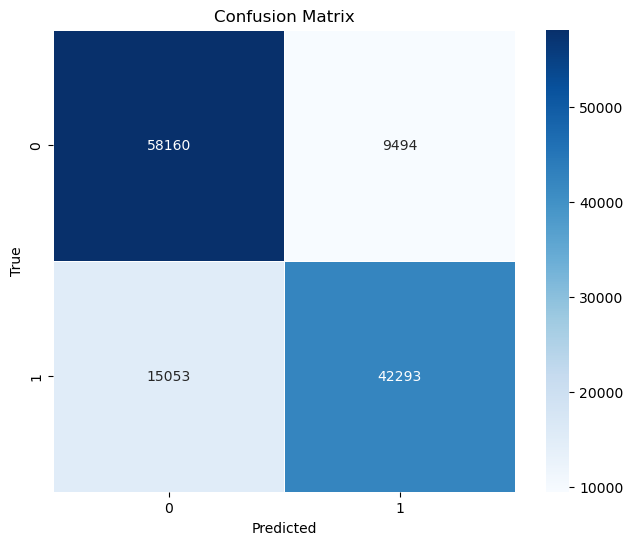

In [34]:
cm = confusion_matrix(y_test, predictions)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83     67654
         1.0       0.82      0.74      0.78     57346

    accuracy                           0.80    125000
   macro avg       0.81      0.80      0.80    125000
weighted avg       0.80      0.80      0.80    125000



# Result:


<span style="font-family:Candara; font-size:1.5em;">
    
**Training Accuracy:** %80.36

**Validation Accuracy:** %80.16

**Test Accuracy:** %80</span>



<span style="font-family:Candara; font-size:1.5em;">
We initially started the training with 10k data. At this data level, we were able to achieve a training accuracy of up to 97% in around 100 epochs. However, due to overfitting on the small dataset, the accuracy on the test and validation sets was significantly lower.

Subsequently, we gradually increased the data size, reaching up to 500k. During these increments, we continuously adjusted hyperparameters to find the optimal results. Thinking that increasing the number of neurons in the hidden layers could improve training, we varied the number from 100 to 500. However, this led to a considerable increase in training time without significant improvements in accuracy. Therefore, we decided on 200 neurons as it provided a good balance between results and training time.

To determine the dropout value, we experimented with logical values and came across a paper suggesting values up to 0.5. After trying values between 0.1 and 0.5, we settled on 0.3 as the optimal dropout value.

In terms of the number of hidden layers, we considered computational cost and accuracy, ultimately deciding on a suitable value based on our experiments.
    
In terms of batch size, we initially experimented with values of 16 and 32. However, as we increased the dataset size, we encountered slow training times. To address this, we progressively increased the batch size to 64, 128, 256, 512, 1024, 2048, and finally 4096. We determined that a batch size of 4096 was optimal, especially when dealing with a dataset size of 500k.

Regarding activation functions, experiments showed that ReLU worked best for hidden layers. However, for the output layer, attempts with softmax did not yield satisfactory results. Consequently, we chose sigmoid, setting a threshold of 0.5. During testing, predictions were considered 0 if below 0.5 and 1 if above 0.5.

In conclusion, the highest validation and test accuracies achieved were around 80%.</span>


# Summary

<span style="font-family:Candara; font-size:1.5em;">
    Gaussian Naive Bayes Accuracy Value: 73%<br>
    Neural Networks Accuracy Value: 80%<br><br>
</span>
<span style="font-family:Candara; font-size:1.5em;">Since Gaussian Naive Bayes produces results using a probabilistic method, it operates very quickly and consistently provides the same result. However, we cannot increase the learning level. On the other hand, Neural Networks, with a more complex structure and the ability to continue learning with optimization methods like gradient descent, can learn to classify much better with the provision of optimal hyperparameters. This situation is evident from the results as well.</span>



# Conclusion

<span style="font-family:Candara; font-size:1.5em;">First we tried to understand what the dataset was and looked at the original article to get an idea. Then, we tried to get to know the data set by obtaining and visualizing the statistical information of the data set. After this stage, we decided which algorithms we would use. We decided to choose Gaussian Naive Bayes and Neural Network since we were familiar with them in class and homework. We then applied these algorithms to the data set and tried to increase our accuracy rate.</span>